![](http://take.ms/XaUPm)
![](http://take.ms/1GV9l)
![](http://take.ms/Bl6FR)
![](http://take.ms/1fIFP)
![](http://take.ms/hbueY)
![](http://take.ms/C213V)

In [1]:
sigma1 = 1
sigma2 = seq(from = 0.5, to = 2, by = 0.01)
p1=p2 = seq(from = 0, to = 1, by = 0.01)
n1=n2 = 50





In [ ]:
generate.X1 <- function(n1, sigma1, p1, weights) {
    F1 <- runif(n1, min = -3, max = 3)

    X1.Norm.ind.matr <- matrix(unlist(lapply(p1, function(p) weights <= p)), nrow = length(weights))
    X1.F1.ind.mart <- !X1.Norm.ind.matr

    X1.F1 <- F1*X1.F1.ind.mart
    
    X1.Norm <- rnorm(n1, mean = 0, sd = sigma1)
    X1 <- X1.Norm*X1.Norm.ind.matr + X1.F1
        
    return(X1)
}

In [ ]:
generate.X2n <- function(n2, sigma2, p2, weights) {
    F2 <- runif(n2, min = -3, max = 3)

    X2.Norm.ind.matr <- matrix(unlist(lapply(p2, function(p) weights <= p)), nrow = length(weights))
    X2.F2.ind.mart <- !X2.Norm.ind.matr

    X2.F2 <- F2*X2.F2.ind.mart
        
    # Генерируем матрицу, в строках которой будут выбороки из
    # нормального распределения с sigma2[ind], где ind номер строки матрицы
    X2.norm.matr <- matrix(rnorm(n2*length(sigma2), mean = 0, sd = sigma2), nrow=length(sigma2))

    # Разделяем матрицу выборок на список выборок
    X2.norm.list <- split(X2.norm.matr, 1:length(sigma2))

    # Для каждой конкретной выборки X2.norm создаем  X2
    # В строках - матрица выборкок по p
    X2n <- lapply(X2.norm.list, function(X2.norm) X2.Norm.ind.matr*X2.norm + X2.F2)
        
    return(X2n)
}

In [ ]:
weights = runif(n1)

In [ ]:
X1 <- generate.X1(n1, sigma1, p1, weights)

In [ ]:
X2n <- generate.X2n(n2, sigma2, p2, weights)

In [ ]:
compute.p.value <- function(n, p, sigma1, sigma2, weights1, weights2) {
    X1 <- generate.X1(n, sigma1, p, weights1)
    X2n <- generate.X2n(n, sigma2, p, weights2)
    
    # список выборок из X1
    X1.list <- split(X1, 1:length(p))
    X2.1.list <- split(X2n[[61]], 1:length(p)) # выборки для 1-й дисперсии
    
    # Список по сигма, списокв по p
    X2n.list <- lapply(X2n, function(X2) split(X2,  1:length(p)))
        
    # Список по сигма, списков пар X1,X2 по p 
    X2n.X1 <- lapply(X2n.list, function(X2.list) split(t(rbind(X1.list, X2.list)), 1:length(p)))
        
    p.value.matr <- lapply(X2n.X1, function(X.sigm) 
        lapply(X.sigm, function(X) var.test(unlist(X[1]), unlist(X[2]))$p.value)
    )
            
    N       <- length(p)
    M       <- length(sigma2)
            
    PV_M <- matrix(unlist(p.value.matr), nrow=N, ncol=M)
    PW_M <- PV_M < 0.05
    return(list(PV_M, PW_M))
}

In [ ]:
ans <- compute.p.value(n1, p1, sigma1, sigma2, weights, weights)

In [ ]:
library(fields)

In [ ]:
N       <- length(p1)
M       <- length(sigma2)

grid    <- expand.grid(x=p1, y=sigma2)


sigma.matr <- matrix(grid$x, nrow=N, ncol=M)
p.matr <- matrix(grid$y, nrow=N, ncol=M)

image.plot(sigma.matr, p.matr, ans[[1]], 
       col = colorRampPalette(c("blue", "cyan", "yellow", "red"))(1024), 
       main="Fisher Test p-values", xlab=expression(p), ylab=expression(sigma))

In [ ]:
draw.p.value(ans[[1]], p1, sigma2)

In [1]:
sigma1 = 1
sigma2 = seq(from = 0.5, to = 2, by = 0.01)
p1=p2 = seq(from = 0, to = 1, by = 0.01)
n1=n2 = 50





### X1

In [2]:
F <- runif(n1, min = -3, max = 3)
weight <- runif(n2)

In [3]:
F1 <- runif(n1, min = -3, max = 3)
X1.weight <- runif(n1)

X1.Norm.ind.matr <- vapply(p1, function(p) X1.weight <= p, FUN.VALUE = numeric(n1))
X1.F1.ind.mart <- !X1.Norm.ind.matr
    
X1.F1 <- F1*X1.F1.ind.mart

In [12]:
vapply(p1, function(p) X1.weight <= p, FUN.VALUE = numeric(n1))

[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
 [1,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [2,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [3,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [4,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [5,]    0    0    0    0    0    0    0    0    0     1     1     1     1
 [6,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [7,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [8,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [9,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[10,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[11,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[12,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[13,]    0    0    0    0    0    0    0    0    1     1     1     1     1
[14,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[15,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[16,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[17,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[18,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[19,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[20,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[21,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[22,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[23,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[24,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[25,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[26,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[27,]    0    0    0    0    0    1    1    1    1     1     1     1     1
[28,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[29,]    0    0    0    0    0    1    1    1    1     1     1     1     1
[30,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[31,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[32,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[33,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[34,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[35,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[36,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[37,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[38,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[39,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[40,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[41,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[42,]    0    0    0    0    0    1    1    1    1     1     1     1     1
[43,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[44,]    0    0    0    0    0    0    0    0    0     0     0     0     1
[45,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[46,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[47,]    0    1    1    1    1    1    1    1    1     1     1     1     1
[48,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[49,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[50,]    0    0    0    0    0    0    0    0    0     0     0     0     0
      [,14] [,15] [,16] [,17] [,18] [,19] [,20] [,21] [,22] [,23] [,24] [,25]
 [1,]     0     0     0     0     0     0     0     0     0     0     0     0
 [2,]     0     0     0  

In [4]:
X1.Norm <- rnorm(n1, mean = 0, sd = sigma1)
X1 <- t(X1.Norm*X1.Norm.ind.matr + X1.F1)
dim(X1)

[1] 101  50

## X2

In [5]:
F2 <- runif(n2, min = -3, max = 3)
X2.weight <- runif(n2)

X2.Norm.ind.matr <- matrix(unlist(lapply(p2, function(p) X2.weight <= p)), nrow = length(X2.weight))
X2.F2.ind.mart <- !X2.Norm.ind.matr

X2.F2 <- F2*X2.F2.ind.mart

In [6]:
# Генерируем матрицу, в строках которой будут выбороки из
# нормального распределения с sigma2[ind], где ind номер строки матрицы
X2.norm.matr <- matrix(rnorm(n2*length(sigma2), mean = 0, sd = sigma2), nrow=length(sigma2))
print(dim(X2.norm.matr))

# Разделяем матрицу выборок на список выборок
X2.norm.list <- split(X2.norm.matr, 1:length(sigma2))
print(all(X2.norm.list[[1]] == X2.norm.matr[1,]))
print(length(X2.norm.list[[1]]))

# Для каждой конкретной выборки X2.norm создаем  X2
X2n <- lapply(X2.norm.list, function(X2.norm) t(X2.Norm.ind.matr*X2.norm + X2.F2))
print(length(X2n))
# В строках - матрица выборкок по p
print(dim(X2n[[1]]))

[1] 151  50
[1] TRUE
[1] 50
[1] 151
[1] 101  50


In [11]:
sigma1 = 1
sigma2 = seq(from = 0.5, to = 2, by = 0.01)
p=p1=p2 = seq(from = 0, to = 1, by = 0.01)
n=n1=n2 = 50





In [ ]:
#F <- runif(n1, min = -3, max = 3)
#weight <- runif(n2)

# Матрица индексов для F1 распределения. Знак => в lapply, т.к. мы берем из F1, если вес < p
Norm.ind.matr <- matrix(unlist(lapply(p1, function(p) weight <= p)), nrow = length(weight))
dim(Norm.ind.matr)

In [ ]:
# Выборки по столбцам
F.p <- F*!Norm.ind.matr
dim(F.p)

### Генерируем X1

In [ ]:
X1.Norm <- rnorm(n1, mean = 0, sd = 1)

# Выборки по строкам
X1 <- t(X1.Norm*Norm.ind.matr + F.p)
dim(X1)

### Генерируем X2

In [ ]:
# Генерируем матрицу, в строках которой будут выбороки из
# нормального распределения с sigma2[ind], где ind номер строки матрицы
X2.norm.matr <- matrix(rnorm(n2*length(sigma2), mean = 0, sd = sigma2), nrow=length(sigma2))
print(dim(X2.norm.matr))

# Разделяем матрицу выборок на список выборок
X2.norm.list <- split(X2.norm.matr, 1:length(sigma2))
print(all(X2.norm.list[[1]] == X2.norm.matr[1,]))
print(length(X2.norm.list[[1]]))

# Для каждой конкретной выборки X2.norm создаем  X2
X2n <- lapply(X2.norm.list, function(X2.norm) t(Norm.ind.matr*X2.norm + F.p))
print(length(X2n))
# В строках - выборки
print(dim(X2n[[1]]))

## Считаем p-value

In [12]:
# список выборок из X1
X1.list <- split(X1, 1:length(p))
X2.1.list <- split(X2n[[61]], 1:length(p)) # выборки для 1-й дисперсии

In [13]:
# Список по сигма, списокв по p
X2n.list <- lapply(X2n, function(X2) split(X2,  1:length(p)))

In [14]:
# Список по сигма, списков пар X1,X2 по p 
X2n.X1 <- lapply(X2n.list, function(X2.list) split(t(rbind(X1.list, X2.list)), 1:length(p)))

In [15]:
p.value.matr <- lapply(X2n.X1, function(X.sigm) 
    lapply(X.sigm, function(X) var.test(unlist(X[1]), unlist(X[2]))$p.value)
)

In [16]:
N       <- length(p)
M       <- length(sigma2)
grid    <- expand.grid(x=p, y=sigma2)

In [17]:
PV_F <- matrix(unlist(p.value.matr), nrow=N, ncol=M)
Pow_ST <- PV_F <= 0.05

In [18]:
library(fields)

Warning message:
: package ‘fields’ was built under R version 3.2.3Loading required package: spam
Loading required package: grid
Spam version 1.3-0 (2015-10-24) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: ‘spam’

Следующие объекты скрыты от ‘package:base’:

    backsolve, forwardsolve

Loading required package: maps
Warning message:
: package ‘maps’ was built under R version 3.2.3
 # maps v3.1: updated 'world': all lakes moved to separate new #
 # 'lakes' database. Type '?world' or 'news(package="maps")'.  #




In [19]:
library(fields)
sigma2.matr <- matrix(grid$x, nrow=N, ncol=M)
p.matr <- matrix(grid$y, nrow=N, ncol=M)

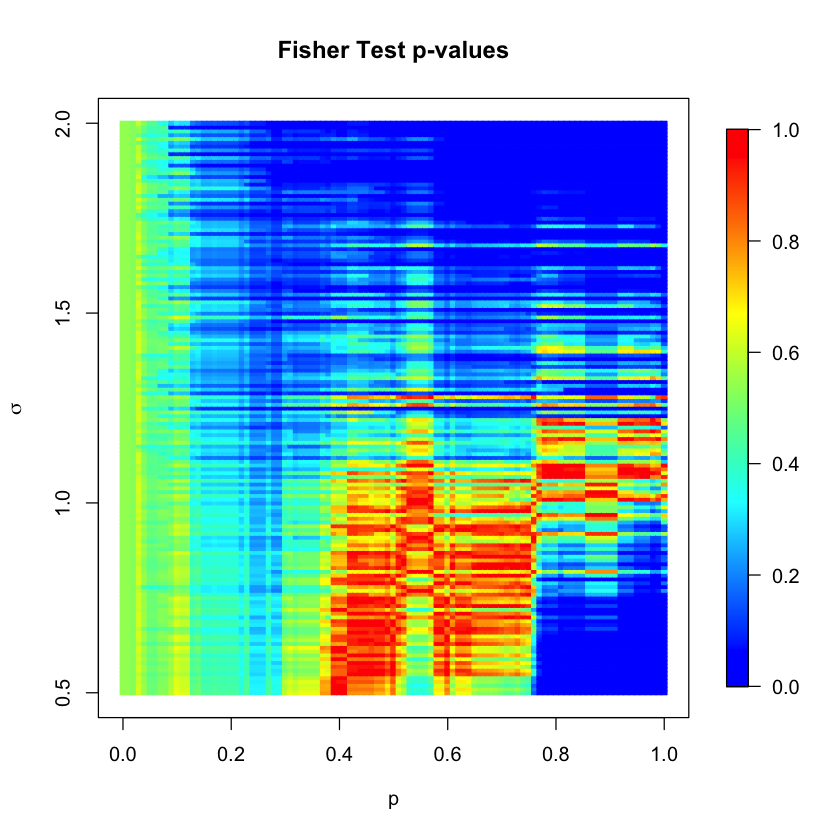

In [20]:
image.plot(sigma2.matr, p.matr, PV_F, 
           col = colorRampPalette(c("blue", "cyan", "yellow", "red"))(1024), 
           main="Fisher Test p-values", xlab=expression(p), ylab=expression(sigma))

In [ ]:
image.plot(sigma2.matr, p.matr, PV_F, 
           col = colorRampPalette(c("blue", "cyan", "yellow", "red"))(1024), 
           main="Fisher Test p-values", xlab=expression(p), ylab=expression(sigma))

In [ ]:
X1.Norm.ind.matr

In [ ]:
X2.Norm.ind.matr

In [ ]:
dim(PV_F)

In [ ]:
max(PV_F[1,])

In [ ]:
which.max(PV_F[1,])

In [ ]:
length(PV_F[1,])

In [ ]:
sigma2[73]

In [ ]:
var.test(rnorm(n1, mean = 0, sd = 1), rnorm(n1, mean = 0, sd = 1))

In [ ]:
dim(X1)

In [ ]:
p.matr

In [ ]:
length(X1.list)

In [ ]:
rbind(X1.list, split(X2n[[1]], 1:n2))

In [ ]:
length(X2n)

In [ ]:
all(splitList[[1]] == X2n[1,])

In [ ]:
mean(splitList[[2]])

In [ ]:
X2n <- lapply(splitList, function(X2) X2*Norm.matr + F.p)

In [ ]:
X2n[[1]]

In [ ]:
TMP1 <- lapply(X2n, function(X2) lapply(split(X2, 1:nrow(X2)), function(X2_row) mean(X2_row)))

In [ ]:
TMP1[[1]]

In [ ]:
ncol(X1)

In [ ]:
length(p1)

In [ ]:
nrow(X2n[[1]])

In [ ]:
split(X1, 1:nrow(X1))

In [ ]:
rnorm(n2, mean = rep(0, length(sigma2)), sd = sigma2)

In [ ]:
sigma2

# X1

In [ ]:
X1.Norm1 = rnorm(n1, mean = 0, sd = sigma1)
X1.F1 = runif(n1, min = -3, max = 3)
X1.weights = runif(n2) < 0.5

In [ ]:
X1 = rep.int(0, 50)
X1[X1.weights] = X1.Norm1[X1.weights]
X1[!X1.weights] = X1.F1[!X1.weights]

In [ ]:
X1

# X2

In [ ]:
X2.Norm2 = rnorm(n2, mean = 0, sd = 1.5)
X2.F2 = runif(n2, min = -3, max = 3)
X2.weights = runif(n2) < 0.3

In [ ]:
X2 = rep.int(0, 50)
X2[X2.weights] = X2.Norm2[X2.weights]
X2[!X2.weights] = X2.F2[!X2.weights]

In [ ]:
X2

In [ ]:
hist(X1, breaks = 30)

In [ ]:
hist(X2, breaks = 30)

In [ ]:
p.value <- function(n1, n2, sigma1, sigma2){

}

In [ ]:
var.test(X1, X2)

![](http://take.ms/dic66)

In [ ]:
qf(0.05, 49, 49, T, lower.tail = F)

In [ ]:
pf(1.1844, 49, 49, T, lower.tail = F)

In [ ]:
hist(rf(1000, 49, 49), 100)

In [ ]:
runif(n2) < 0.2
runif(n2) < 0.2

In [ ]:
runif(n1) < p1[0]
runif(n2) < p2[0]

In [ ]:
runif(n2) < 

In [ ]:
sigma1 = 1
sigma2 = 1

In [ ]:
x1_seq = 
x2_seq = 